## Frist EXAMPLE

In [46]:
import keras
from keras.datasets import mnist
  
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 4s 0us/step


In [47]:
train_images.shape

(60000, 28, 28)

In [49]:
train_images = train_images.reshape((60000, 28 * 28)) 
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)) 
test_images = test_images.astype('float32') / 255

In [51]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,))) 
network.add(layers.Dense(10, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


this network consists of a chain of two Dense layers,

In [52]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy',
                        metrics=['accuracy'])

In [55]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [56]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)


Epoch 1/5
60000/60000 [==============================] - 5s 84us/step - loss: 0.2547 - accuracy: 0.9268
Epoch 2/5
60000/60000 [==============================] - 4s 71us/step - loss: 0.1032 - accuracy: 0.9694
Epoch 3/5
60000/60000 [==============================] - 4s 75us/step - loss: 0.0680 - accuracy: 0.9797
Epoch 4/5
60000/60000 [==============================] - 5s 75us/step - loss: 0.0490 - accuracy: 0.9853
Epoch 5/5
60000/60000 [==============================] - 4s 74us/step - loss: 0.0373 - accuracy: 0.9888


In [57]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 82us/step


In [58]:
print('test_acc:', test_acc)

test_acc: 0.9794999957084656


## Convolution: 1D operation with Python (Numpy/Scipy)

In [72]:
import numpy as np

h = [2, 1, 0]
x = [3, 4, 5]
 

y = np.convolve(x, h)
y  

array([ 6, 11, 14,  5,  0])

In [73]:
import numpy as np

x = [6, 2]
h = [1, 2, 5, 4]

y = np.convolve(x, h, "valid")   # valid returns output of length max(x, h) - min(x, h) + 1, this is to ensure that values outside of the boundary of 
                                # h will not be used in the calculation of the convolution
                                # in the next example we will understand why we used the argument valid
y  

array([14, 34, 34])

Suppose that you have two tensors:

3x3 filter (4D tensor = [3,3,1,1] = [width, height, channels, number of filters])
10x10 image (4D tensor = [1,10,10,1] = [batch size, width, height, number of channels]
The output size for zero padding 'SAME' mode will be:

the same as input = 10x10
The output size without zero padding 'VALID' mode:

input size - kernel dimension + 1 = 10 -3 + 1 = 8 = 8x8

In [74]:
import tensorflow as tf

#Building graph

input = tf.Variable(tf.random_normal([1, 10, 10, 1]))
filter = tf.Variable(tf.random_normal([3, 3, 1, 1]))
op = tf.nn.conv2d(input, filter, strides=[1, 1, 1, 1], padding='VALID')
op2 = tf.nn.conv2d(input, filter, strides=[1, 1, 1, 1], padding='SAME')

#Initialization and session
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)

    print("Input \n")
    print('{0} \n'.format(input.eval()))
    print("Filter/Kernel \n")
    print('{0} \n'.format(filter.eval()))
    print("Result/Feature Map with valid positions \n")
    result = sess.run(op)
    print(result)
    print('\n')
    print("Result/Feature Map with padding \n")
    result2 = sess.run(op2)
    print(result2)

Input 

[[[[ 2.0113473e+00]
   [-8.7337714e-01]
   [ 3.5516679e-01]
   [-1.1977479e+00]
   [ 4.4119868e-01]
   [ 2.1245193e+00]
   [ 9.4798493e-01]
   [ 4.5947332e-02]
   [-1.6768193e+00]
   [ 2.1280303e+00]]

  [[-5.1104343e-01]
   [-1.9291254e+00]
   [ 1.3715962e-01]
   [-3.2772348e+00]
   [-1.3739942e+00]
   [-8.8046831e-01]
   [ 9.9437600e-01]
   [ 4.4972238e-01]
   [ 7.7993602e-01]
   [-8.0588245e-01]]

  [[ 8.9846805e-02]
   [-1.1043116e+00]
   [ 1.1253356e-01]
   [ 1.8160851e+00]
   [ 9.0592343e-01]
   [-6.4272648e-01]
   [-1.5499758e+00]
   [-6.3216960e-01]
   [-1.3328141e+00]
   [-1.7601816e-01]]

  [[ 3.0196819e-01]
   [ 1.4577079e+00]
   [ 2.2674613e+00]
   [-6.6198575e-01]
   [-3.2374775e-01]
   [-2.9469353e-01]
   [-3.0965242e-01]
   [ 2.3285204e-01]
   [-1.2765939e+00]
   [-1.0166169e+00]]

  [[ 3.1901779e+00]
   [-1.2396575e+00]
   [-4.5478813e-02]
   [ 8.4976095e-01]
   [ 1.8558311e+00]
   [-5.4555196e-01]
   [ 4.1970067e-02]
   [-6.2908435e-01]
   [-2.9677531e-01]
   [

## Preparing the IMDB data

In [75]:
from keras.datasets import imdb
from keras.preprocessing import sequence
max_features = 10000
max_len = 500
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features) 
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
#sequence.pad_sequences make them as the same length
x_test = sequence.pad_sequences(x_test, maxlen=max_len) 
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)


Loading data...
17465344/17464789 [==============================] - 5s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


In [77]:
from keras.models import Sequential 
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len)) 
model.add(layers.Conv1D(32, 7, activation='relu')) 
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu')) 
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))
model.summary()



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
___________________________________________

In [78]:
model.compile(optimizer=RMSprop(lr=1e-4), loss='binary_crossentropy',
metrics=['acc']) 
history = model.fit(x_train, y_train,
epochs=10, batch_size=128, validation_split=0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 57s 3ms/step - loss: 0.8335 - acc: 0.5089 - val_loss: 0.6879 - val_acc: 0.5442
Epoch 2/10
20000/20000 [==============================] - 56s 3ms/step - loss: 0.6718 - acc: 0.6488 - val_loss: 0.6651 - val_acc: 0.6700
Epoch 3/10
20000/20000 [==============================] - 58s 3ms/step - loss: 0.6285 - acc: 0.7466 - val_loss: 0.6122 - val_acc: 0.7466
Epoch 4/10
20000/20000 [==============================] - 56s 3ms/step - loss: 0.5410 - acc: 0.8062 - val_loss: 0.4992 - val_acc: 0.8062
Epoch 5/10
20000/20000 [==============================] - 51s 3ms/step - loss: 0.4150 - acc: 0.8454 - val_loss: 0.4194 - val_acc: 0.8306
Epoch 6/10
20000/20000 [==============================] - 52s 3ms/step - loss: 0.3481 - acc: 0.8682 - val_loss: 0.4164 - val_acc: 0.8278
Epoch 7/10
20000/20000 [=========

In [83]:
history_dict = history.history
val_loss_values, history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

this is a convincing demonstration that a 1D convnet can offer a fast, cheap alternative to a recurrent network on a word-level sentiment-classification task.

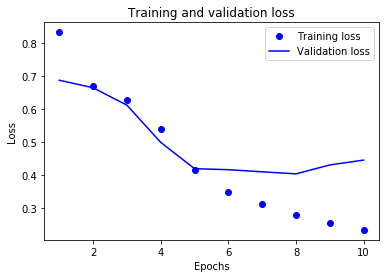

In [86]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss']
epochs = range(1, 11)
plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')

plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

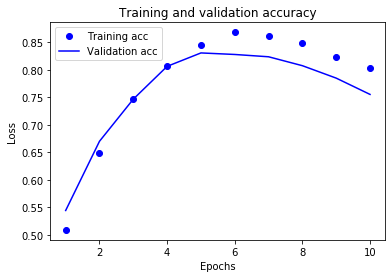

In [89]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.clf() 
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

## boston_housing PREDICTION

In [90]:
from keras.datasets import boston_housing
(x_train,y_train),(x_test,y_test)=boston_housing.load_data()

57344/57026 [==============================] - 0s 6us/step


In [91]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(404, 13)
(404,)
(102, 13)
(102,)


## Normalizing the data 

In [97]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler()
x_train = std_scale.fit(x_train).transform(x_train)
x_test=std_scale.fit(x_test).transform(x_test)

## Model Definition

In [104]:
from keras import models
from keras import layers

def build_model():
    model=models.Sequential()
    model.add(layers.Dense(64,activation='relu',
                          input_shape=(x_train.shape[1],)))
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
    return model

mse--This is a widely used loss function for regression problems.

mean absolute error (MAE) For instance, an MAE of 0.5 on this problem would mean your predictions are off by $500 on average.


## K-fold validation and save the history

In [126]:
import numpy as np
k=4
num_val_sample=len(x_train)//k
num_epoch=200
all_scores=[]
all_mae_histories = []

In [118]:
import matplotlib.pyplot as plt
history_dict = history.history
history_dict

{'val_loss': [27.060620573268615,
  18.375446055463104,
  17.47179553545274,
  12.92282616610882,
  12.183775711544135,
  11.583727755843164,
  11.810370877537862,
  9.617572139455282,
  9.403632094768351,
  13.946130077498832,
  9.517087389658537,
  11.100921646143208,
  10.090863648124657,
  8.108117003169706,
  8.256423112367424,
  9.523598672471719,
  8.877192688893786,
  8.03749521078826,
  8.786250181680563,
  11.296186905287408],
 'val_mae': [3.206486463546753,
  2.7781951427459717,
  3.034677028656006,
  2.3371312618255615,
  2.293325185775757,
  2.158959150314331,
  2.2043633460998535,
  2.018859624862671,
  2.094975709915161,
  2.941922426223755,
  2.2304093837738037,
  2.2602739334106445,
  2.1253161430358887,
  1.9039078950881958,
  1.9963642358779907,
  2.4057443141937256,
  2.2560055255889893,
  1.9079103469848633,
  2.203082799911499,
  2.7751288414001465],
 'loss': [181.18791875294824,
  25.40688084916726,
  18.847433053951296,
  17.01862559750332,
  15.724620326766862,

In [127]:
for i in range(k):
    print('processing fold #',i)
    val_data=x_train[i*num_val_sample:(i+1)*num_val_sample]
    val_target=y_train[i*num_val_sample:(i+1)*num_val_sample]
    
    partial_train_data=np.concatenate([
    x_train[:i*num_val_sample],
    x_train[(i+1)*num_val_sample:]],axis=0)
    partial_train_target=np.concatenate([
    y_train[:i*num_val_sample],
    y_train[(i+1)*num_val_sample:]],axis=0)
    model=build_model()
    history = model.fit(partial_train_data, partial_train_target,
validation_data=(val_data, val_target),
epochs=num_epoch, batch_size=1, verbose=0)
    
    mae_history=history.history['mae']
    
    val_mse, val_mae = model.evaluate(val_data, val_target, verbose=0)
    all_scores.append(val_mae)
    all_mae_histories.append(mae_history)


processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


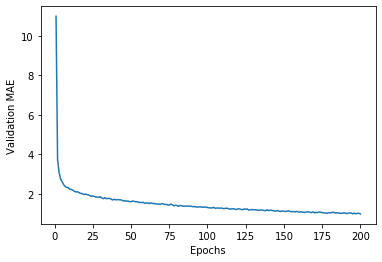

In [128]:
average_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(num_epoch)]

import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history) 
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

Replace each point with an exponential moving average of the previous points,
to obtain a smooth curve.

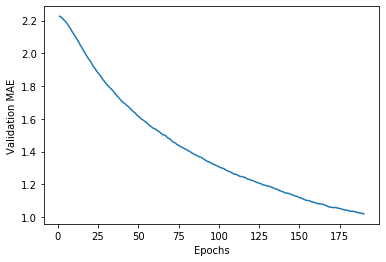

In [130]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else: 
            smoothed_points.append(point)
    return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])
# exclude the first 10 point

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history) 
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()


In [136]:
model = build_model() 
model.fit(x_train, y_train, epochs=80, batch_size=16, verbose=0)



In [138]:
test_mse_score, test_mae_score = model.evaluate(x_test, y_test)

102/102 [==============================] - 0s 4ms/step


In [139]:
test_mae_score

2.9330952167510986

* Mean squared error (MSE) is a loss function commonly used for regression.
* A common regression metric is mean absolute error (MAE).
* Normaliztion --preprocessing step.
* When there is little data available, using K-fold validation is a great way to relibly evaluate a model(train and valiate several times).

## fashion image cnn

In [3]:
import tensorflow as tf
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
train_images.shape

(60000, 28, 28)

## Preprocess the data

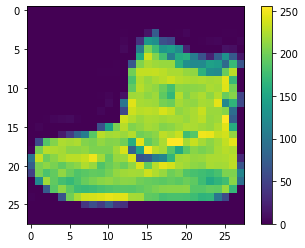

In [173]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [177]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [178]:
train_images.shape

(60000, 28, 28)

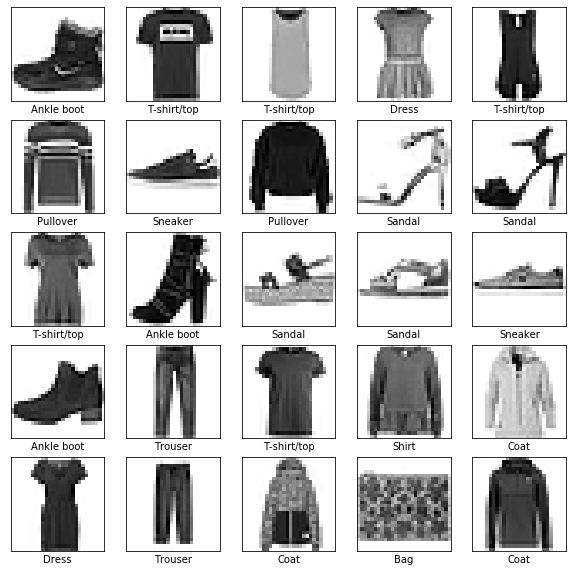

In [175]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 111us/sample - loss: 3.9563 - acc: 0.6806
Epoch 2/10
60000/60000 [==============================] - 6s 108us/sample - loss: 0.7260 - acc: 0.7325
Epoch 3/10
60000/60000 [==============================] - 6s 108us/sample - loss: 0.6274 - acc: 0.7713
Epoch 4/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.5933 - acc: 0.7918
Epoch 5/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.5519 - acc: 0.8056
Epoch 6/10
60000/60000 [==============================] - 7s 124us/sample - loss: 0.5395 - acc: 0.8094
Epoch 7/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.5117 - acc: 0.8213
Epoch 8/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.5053 - acc: 0.8261ETA: 0s - loss: 0.5065 - a
Epoch 9/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.5037 - acc: 0.8253
Epoch 10/10
60000/60000 [===

In [10]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.5604 - acc: 0.8145

Test accuracy: 0.8145


## Make predictions

In [11]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)



In [13]:
predictions[0]

array([5.6910182e-10, 1.2423021e-10, 2.7294388e-37, 2.1657123e-12,
       3.0170076e-31, 2.0779487e-02, 6.7541547e-17, 3.4530473e-01,
       6.0029888e-05, 6.3385582e-01], dtype=float32)

In [14]:
np.argmax(predictions[0])

9

In [15]:
test_labels[0]

9

In [17]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

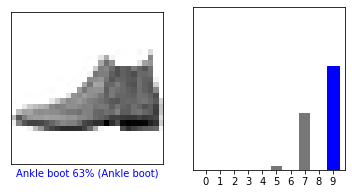

In [18]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()



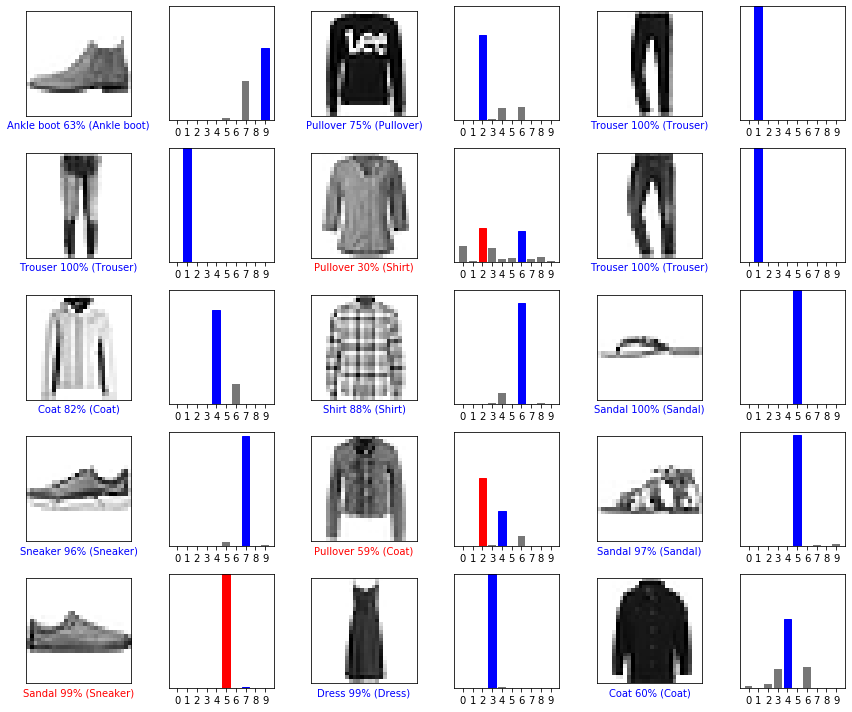

In [19]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()